## HAMOYE Stage C Quiz Solution
MACHINE LEARNING: CLASSIFICATION

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd


In [22]:
#reading in the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [23]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [24]:
#dropping the stab column
df = df.drop('stab', axis = 1)

In [25]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [27]:
#encoding the target feature
df['stabf'] = df['stabf'].map({'stable':1, 'unstable':0})
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [ ]:
#spliting for the validation

In [28]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('stabf', axis = 1)
y = df.stabf

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#normalising the dataset

In [44]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
_xtrain = standard.fit_transform(xtrain)

In [45]:
_xtest = standard.transform(xtest)

In [ ]:
#modelling

In [39]:
from lightgbm import LGBMClassifier

In [76]:
lgb = LGBMClassifier(random_state=1)
lgb.fit(_xtrain,ytrain)

LGBMClassifier(random_state=1)

In [77]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [78]:
accuracy_score(ytest, lgb.predict(_xtest))

0.9375

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(_xtrain, ytrain)

RandomForestClassifier(random_state=1)

In [84]:
accuracy_score(ytest, rfc.predict(_xtest))

0.9295

In [56]:
from xgboost import XGBClassifier

In [85]:
xgb =  XGBClassifier(random_state=1)
xgb.fit(_xtrain,ytrain)

XGBClassifier(random_state=1)

In [86]:
accuracy_score(ytest, xgb.predict(_xtest))

0.9195

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
ext =  ExtraTreesClassifier(random_state=1)
ext.fit(_xtrain,ytrain)

ExtraTreesClassifier(random_state=1)

In [88]:
accuracy_score(ytest, ext.predict(_xtest))

0.9285

In [63]:
ext.feature_importances_

array([0.11666384, 0.11860657, 0.11530431, 0.11568128, 0.03983232,
       0.04014785, 0.04024499, 0.04001714, 0.08864533, 0.09494974,
       0.09662064, 0.09328599])

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    # warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
    
    # plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()

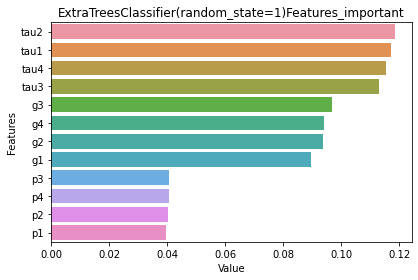

In [91]:
feat_imp_ploter(ext,xtrain)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
param_dist = { 
    'n_estimators': [100,300,500,1000],
    'min_samples_split':[2,5,7],
    'min_samples_leaf' : [4, 6, 8],
    'max_features' : [None, 'auto', 'log2']
}

In [107]:
clf = RandomizedSearchCV(ext, param_distributions= param_dist, n_iter=10, scoring='accuracy',n_jobs=-1,verbose=1,  random_state=1)
search = clf.fit(_xtrain, ytrain)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 1000}